# Пособие по Augmentation

## Использование LookGenerator.config.config

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np

from LookGenerator.config.config import DatasetConfig

Config = DatasetConfig(os.environ)
None

In [25]:
Config.DATASET_DIR

'C://Users//zanoo//PycharmProjects//zalando-hd-resized'

## Класс датасет для работы с файлами

In [55]:
from torchvision.transforms import ToTensor
import torch
import numpy as np

from PIL import Image
from torch.utils.data import Dataset
from LookGenerator.datasets.utils import load_image

In [56]:
class ImageDataset(Dataset):
    """ Dataset of images """

    def __init__(self, img_dir: str):
        """
        Args:
            img_dir (string) : path to images
        """

        super().__init__()

        self.root = img_dir
        self._files_list = os.listdir(img_dir)

    def __getitem__(self, idx) -> np.array:
        """
        Args: idx: The index of data sample
        Returns:
            Return np.array that represent image
        """

        if torch.is_tensor(idx):
            idx = idx.tolist()

        input_ = np.array(load_image((os.path.join(self.root, self._files_list[idx]))))
        return input_

    def __len__(self):
        return len(self._files_list)


## Импорт изображений человека и фона

In [57]:
dataset_of_image = ImageDataset(os.path.join(Config.DATASET_DIR, "train", "image"))
dataset_of_mask = ImageDataset(os.path.join(Config.DATASET_DIR, "train", "image-parse-v3"))
dataset_of_background = ImageDataset(os.path.join(Config.HOUSE_ROOM_DATASET, "Bedroom"))

In [58]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage

In [59]:
def print_person_image(data_of_image):
    fig = plt.figure(figsize=(10, 7))

    fig.add_subplot(1,2, 1)
    plt.imshow(ToPILImage()(data_of_image[0]))

    fig.add_subplot(1,2, 2)
    plt.imshow(ToPILImage()(data_of_image[1]))

IndexError: index 1 is out of bounds for dimension 0 with size 1

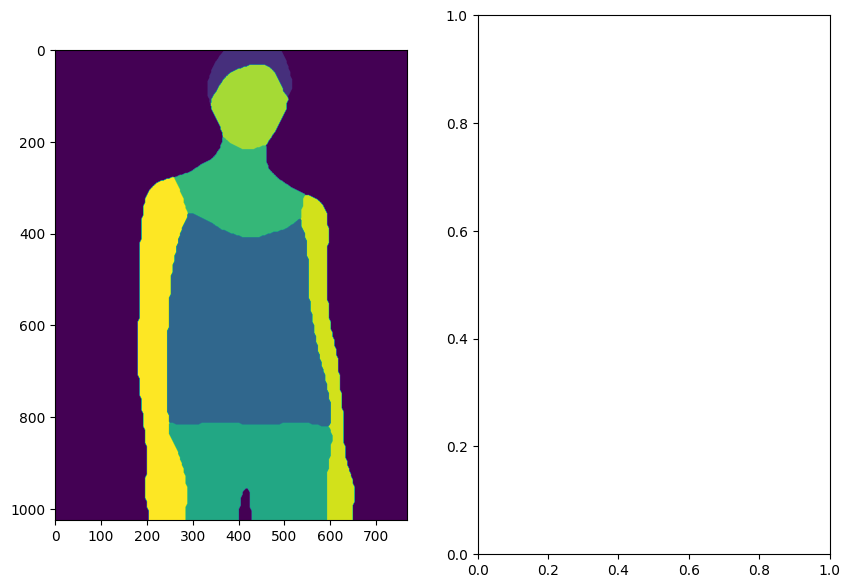

In [72]:
image = dataset.__getitem__(0)

print_person_image(image)

In [62]:
image.shape

torch.Size([1, 1024, 768])

In [23]:
ToPILImage()(image[0])

NameError: name 'image' is not defined

In [ ]:
sum = 0
for i in image[1]:
    for j in i:
        sum+=1

In [ ]:
1024*756